In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import  ConfusionMatrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from warnings import simplefilter
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [ ]:
# Charger les données dans un DataFrame 
df=pd.read_csv("heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# afficher Dataset Info
print('\033[1m'+':: Dataset Info ::'+'\033[0m')
print('Total Rows:', df.shape[0])
print('Total Columns:', df.shape[1])
# afficher Dataset Details
print('\n')
print('\033[1m'+':: Dataset Details ::'+'\033[0m')
df.info()

:: Dataset Info ::
Total Rows: 920
Total Columns: 16


:: Dataset Details ::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


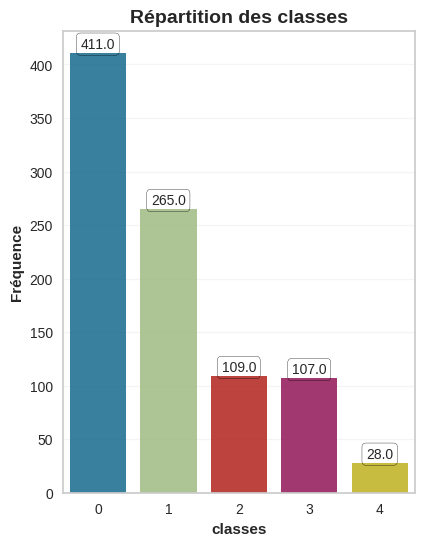

In [ ]:
# Définir l'ordre des catégories dans l'histogramme
order=df['num'].value_counts().index
# Créer la figure et l'axe pour l'histogramme
plt.figure(figsize=(10, 6))
countplt = plt.subplot(1, 2, 2)
# Créer l'histogramme avec Seaborn
ax = sns.countplot(x='num', data=df,  order=order,alpha=0.85)
# Ajouter les annotations pour afficher les valeurs des barres
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))
# Titre et labels d'axe
plt.title('Répartition des classes', fontweight='bold', fontsize=14)
plt.xlabel('classes', fontweight='bold', fontsize=11)
plt.ylabel('Fréquence', fontweight='bold', fontsize=11)
# Définir les labels des ticks de l'axe x
labels = order.astype(str)
# Définir les labels des ticks de l'axe x à partir des valeurs uniques de la colonne "num"
plt.xticks(range(len(labels)), labels)
# Ajouter une grille
plt.grid(axis='y', alpha=0.2)
# Afficher l'histogramme
plt.show()

**Gestion des doublons** 

In [ ]:
# Compter le nombre total de lignes dupliquées
total_duplicates = df.duplicated().sum()

# Afficher le nombre total de lignes dupliquées dans le DataFrame
print("Nombre total de lignes dupliquées : ", total_duplicates)

Nombre total de lignes dupliquées :  0


**Gestion de la cohérance des modalité**

In [ ]:
# Génèration d'un résumé statistique pour les colonnes numériques (int64, float64) 
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# Génèration d'un résumé statistique uniquement pour les colonnes de type object (données catégorielles) 
df.describe(include='O')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [ ]:
# Création de listes vides pour stocker les données catégorielles et numériques
cat_data = []
num_data = []

# Boucle pour parcourir les types de données de chaque colonne dans le dataframe df
for i, c in enumerate(df.dtypes):
    if c == object:  # Vérifier si le type de données est un objet (catégoriel)
        # Ajouter la colonne à la liste cat_data
        cat_data.append(df.iloc[:, i])
    else:
        # Ajouter la colonne à la liste num_data
        num_data.append(df.iloc[:, i])

# Création de dataframes pour les données catégorielles et numériques
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [ ]:
# Vérification  de la cohérence interne des modalités dans chaque colonne catégorielle du dataframe
for col in cat_data :
  print(df[col].value_counts())
  print('')

Male      726
Female    194
Name: sex, dtype: int64

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

False    692
True     138
Name: fbs, dtype: int64

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

False    528
True     337
Name: exang, dtype: int64

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64



**Gestion des valeurs manquantes**

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

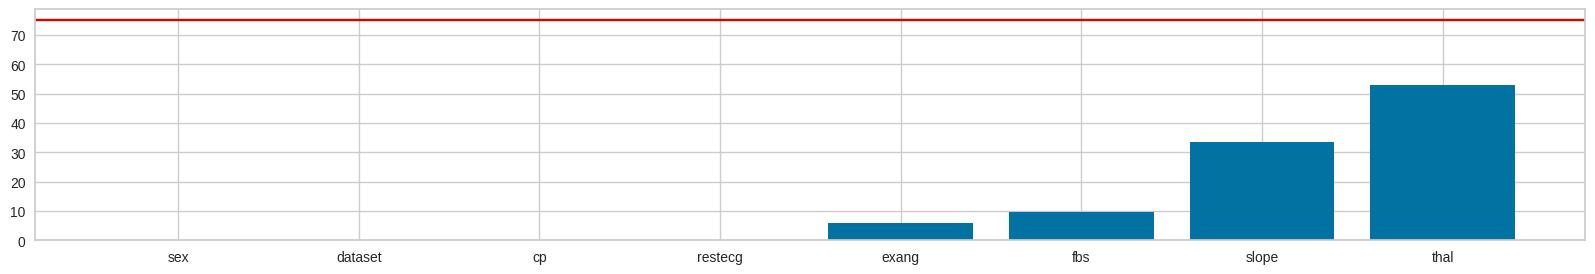

In [ ]:
#Pourcentage des valeurs manquantes par variable catégorique
prct_manquantes=cat_data.isna().sum()*100/cat_data.shape[0]
round(prct_manquantes.sort_values(),2)
fig=plt.figure(figsize=(20,3))
plt.bar(x=prct_manquantes.sort_values().index,height=prct_manquantes.sort_values().values)
plt.axhline(y=75,color='r',linestyle ='-')

In [ ]:
#pour les variables catégoriques on va remplacer les valeurs manquantes par les valeurs qui se repetent le plus 
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

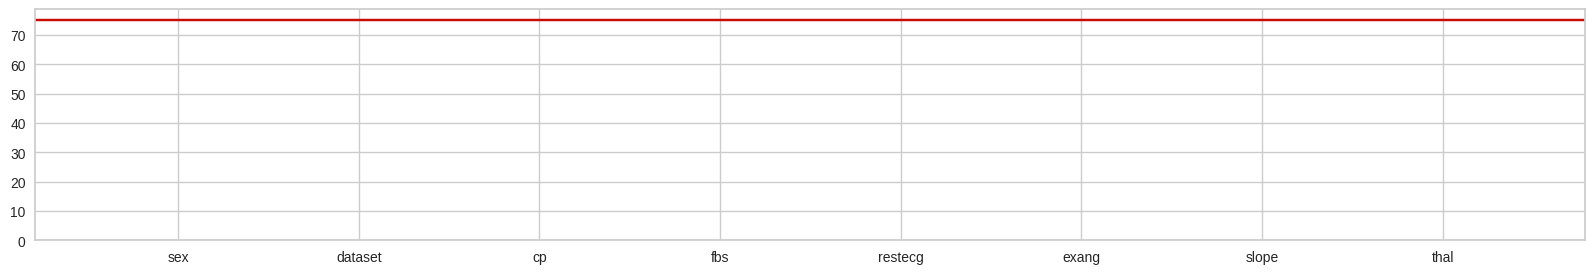

In [ ]:
#Pourcentage des valeurs manquantes par variable numérique
prct_manquantes=cat_data.isna().sum()*100/cat_data.shape[0]
round(prct_manquantes.sort_values(),2)
fig=plt.figure(figsize=(20,3))
plt.bar(x=prct_manquantes.sort_values().index,height=prct_manquantes.sort_values().values)
plt.axhline(y=75,color='r',linestyle ='-')

In [ ]:
df[cat_data.columns] = cat_data

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64

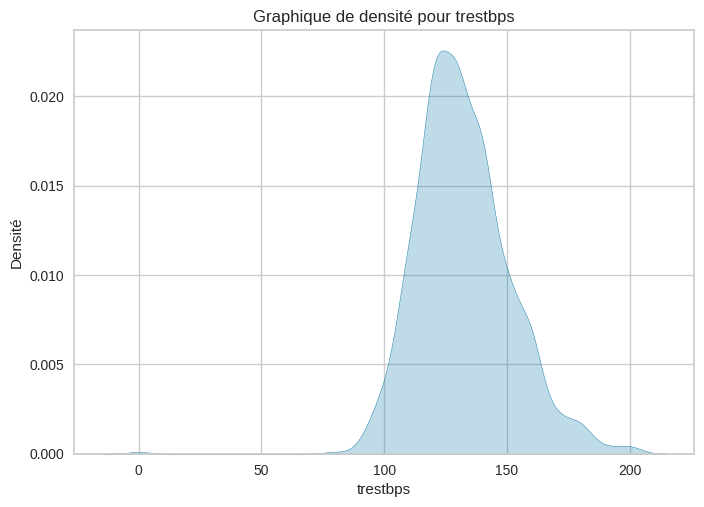

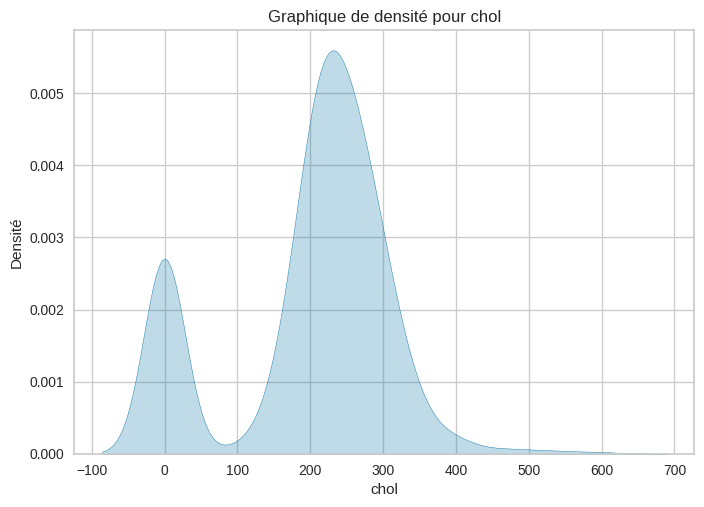

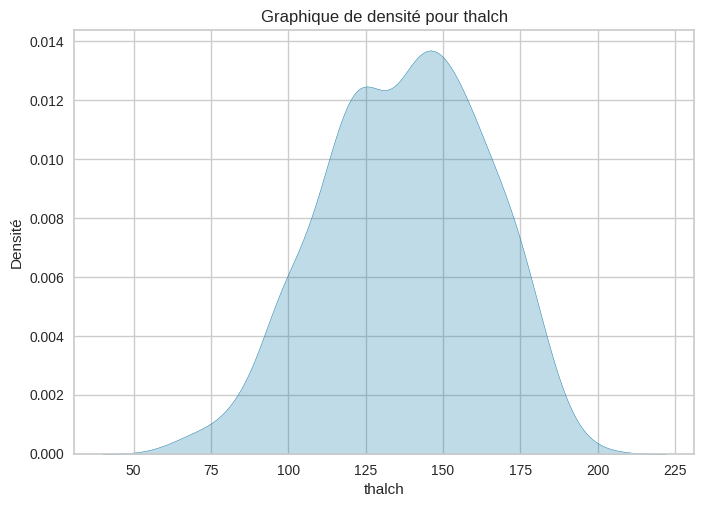

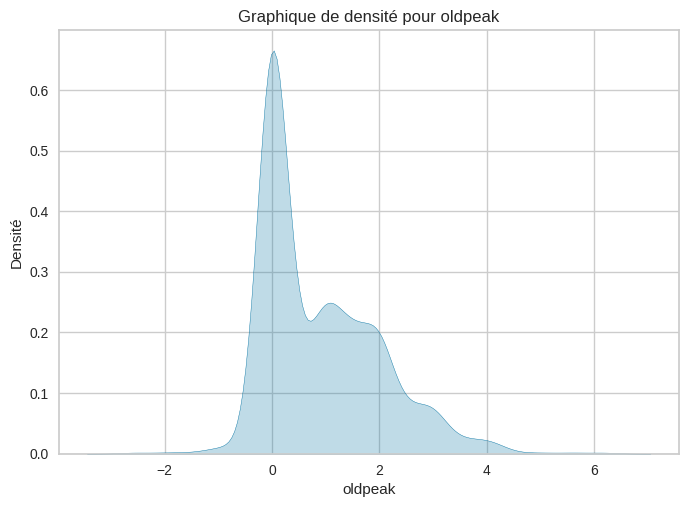

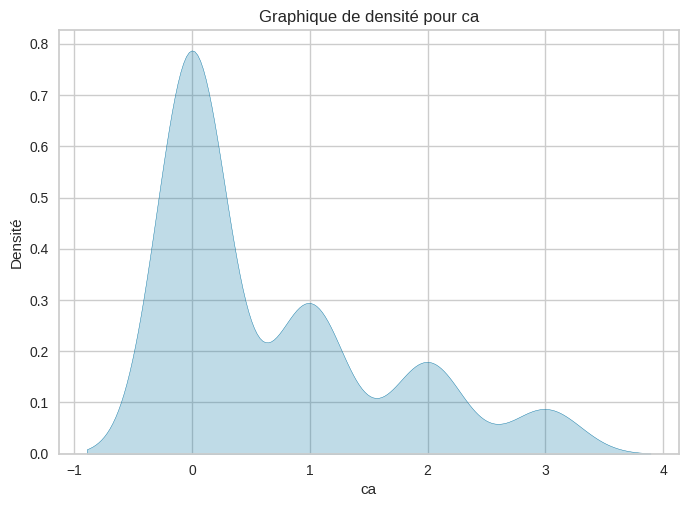

In [ ]:
# Identifier les variables numériques 
num_varsN = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
# Parcourir les colonnes numériques et tracer les graphiques de densité
for col in num_varsN:
    sns.kdeplot(df[col], shade=True)  # Utiliser sns.kdeplot() pour tracer la densité
    plt.xlabel(col)  # Utiliser le nom de la colonne comme étiquette de l'axe x
    plt.ylabel('Densité')  # Utiliser 'Densité' comme étiquette de l'axe y
    plt.title('Graphique de densité pour ' + col)  # Utiliser le nom de la colonne comme titre
    plt.show()  # Afficher le graphique de densité

In [ ]:
for col in num_varsN:
  #Calcul du coefficient d'asymetrie
  skew =round(df[col].skew(),3)
  print(col)
  print("Skewness : {}".format(skew))
  print(df[col].describe().loc[['mean','50%','std']])
  #calcul du coefficient de variation
  cv = df[col].describe().loc['std']/df[col].describe().loc['mean']
  print("Dispersion par unite de moyenne : {}%".format(round(cv*100,2)))
  print(" ")

trestbps
Skewness : 0.213
mean    132.132404
50%     130.000000
std      19.066070
Name: trestbps, dtype: float64
Dispersion par unite de moyenne : 14.43%
 
chol
Skewness : -0.614
mean    199.130337
50%     223.000000
std     110.780810
Name: chol, dtype: float64
Dispersion par unite de moyenne : 55.63%
 
thalch
Skewness : -0.211
mean    137.545665
50%     140.000000
std      25.926276
Name: thalch, dtype: float64
Dispersion par unite de moyenne : 18.85%
 
oldpeak
Skewness : 1.041
mean    0.878788
50%     0.500000
std     1.091226
Name: oldpeak, dtype: float64
Dispersion par unite de moyenne : 124.17%
 
ca
Skewness : 1.166
mean    0.676375
50%     0.000000
std     0.935653
Name: ca, dtype: float64
Dispersion par unite de moyenne : 138.33%
 


In [ ]:
for i in num_varsN:
  num_data[i].fillna(num_data[i].median(),inplace=True)
print(num_data.isnull().sum().any())

False


In [ ]:
df[num_data.columns] = num_data

In [ ]:
#Remplacer les valeurs catégoriques par des valeurs numeriques 0,1,2,..
le=LabelEncoder()
for i in cat_data:
  df[i]=le.fit_transform(df[i])

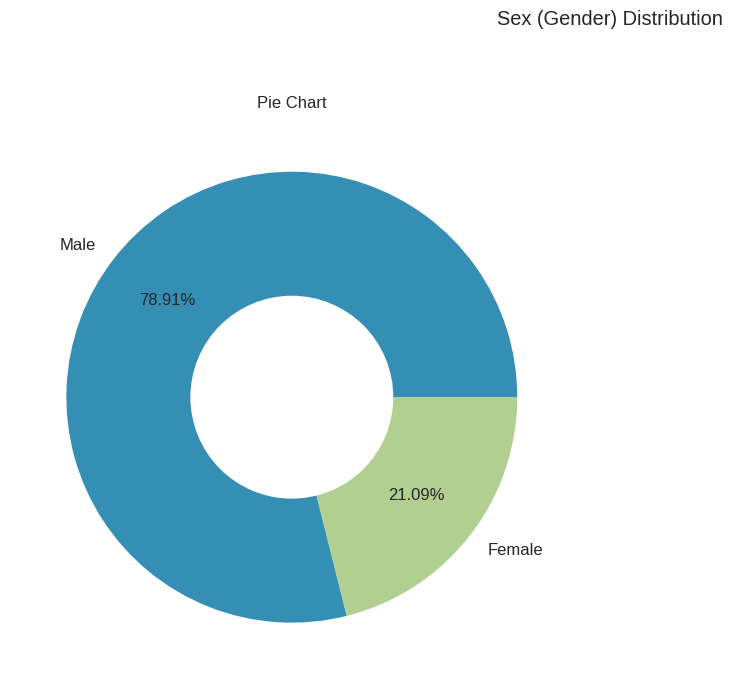

In [ ]:
# Définir les labels pour le graphique en camembert
labels = ['Male', 'Female']

# Créer une figure avec une taille de 16x8 pouces
plt.figure(figsize=(16, 8))

# Ajouter un titre principal à la figure
plt.suptitle('Sex (Gender) Distribution')

# --- Graphique en camembert ---
# Ajouter un sous-plot pour le graphique en camembert
plt.subplot(1, 2, 1)

# Ajouter un titre pour le graphique en camembert
plt.title('Pie Chart')

# Utiliser la méthode .pie() pour tracer le graphique en camembert et spécifier les arguments
plt.pie(df['sex'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})

# Ajouter un cercle au centre du graphique en camembert pour créer un trou
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

<Axes: title={'center': 'Histogram'}, xlabel='Chest pain type', ylabel='Level'>

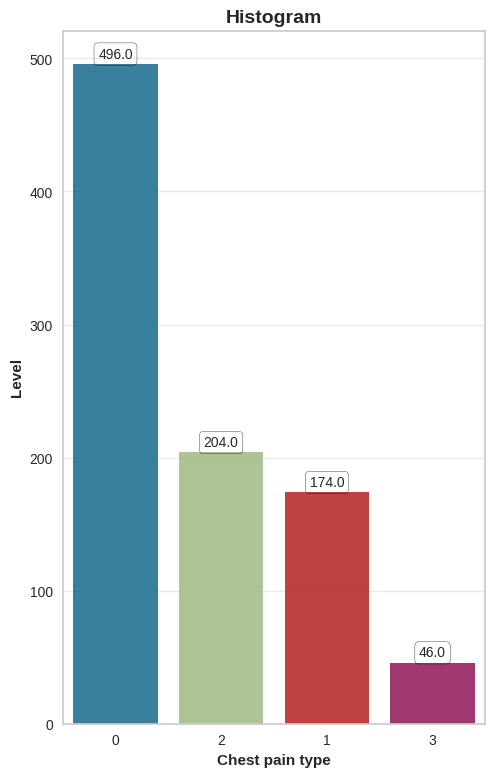

In [ ]:
# Définir les étiquettes pour les types de douleur thoracique
labels=['asymptomatic', 'atypical angina' ,'non-angina', 'typical angina']

# Obtenir l'ordre de tri des types de douleur thoracique en fonction de leur fréquence d'apparition
order=df['cp'].value_counts().index

# Définir la taille de la figure pour le graphique
plt.figure(figsize=(12, 9))

# Définir le sous-graphique pour l'histogramme
countplt = plt.subplot(1, 2, 2)

# Définir le titre de l'histogramme
plt.title('Histogram', fontweight='bold', fontsize=14)

# Tracer l'histogramme des types de douleur thoracique
ax = sns.countplot(x='cp', data=df, order=order, alpha=0.85)

# Ajouter des étiquettes pour le nombre d'occurrences de chaque type de douleur thoracique
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

# Définir l'étiquette de l'axe x
plt.xlabel('Chest pain type', fontweight='bold', fontsize=11)

# Définir l'étiquette de l'axe y
plt.ylabel('Level', fontweight='bold', fontsize=11)

# Définir les étiquettes pour les valeurs de l'axe x
labels = order.astype(str)

plt.xticks(range(len(labels)), labels)

# Ajouter une grille horizontale pour faciliter la lecture de l'histogramme
plt.grid(axis='y', alpha=0.4)

# Afficher l'histogramme
countplt

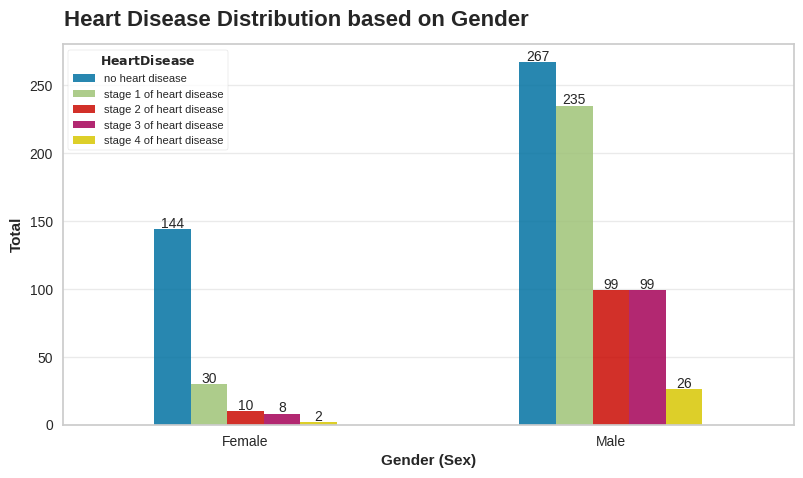

In [ ]:
# Définition des labels pour les classes de maladie cardiaque et pour les deux genres
labels = ['no heart disease','stage 1 of heart disease','stage 2 of heart disease','stage 3 of heart disease','stage 4 of heart disease']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']

# --- Creating Bar Chart ---
# Création du graphique à barres en utilisant la fonction crosstab() de pandas
# Cette fonction est utilisée pour calculer un tableau croisé des fréquences des variables données
# Les variables "sex" et "num" sont les variables utilisées pour le graphique à barres
# La méthode .plot() est utilisée pour tracer le graphique à barres
# La taille et l'opacité des barres sont également spécifiées
ax = pd.crosstab(df.sex, df.num).plot(kind='bar', figsize=(8, 5), alpha=0.85)

# --- Bar Chart Settings ---
# Configuration des paramètres du graphique à barres
# Les annotations sont ajoutées à chaque barre pour afficher les valeurs correspondantes
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+1.25,rect.get_height(), horizontalalignment='center', fontsize=10)

# Titres et légendes pour le graphique
plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16')


# Réglage de la mise en page pour le graphique
plt.tight_layout(rect=[0, 0.04, 1, 1.025])

# Configuration des étiquettes des axes
plt.xlabel('Gender (Sex)', fontweight='bold')
plt.ylabel('Total',  fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)

# Ajout de la grille
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)

# Ajout de la légende
plt.legend(labels=labels, title='$\\bf{Heart Disease}$', fontsize='8', title_fontsize='9', loc='upper left', frameon=True)



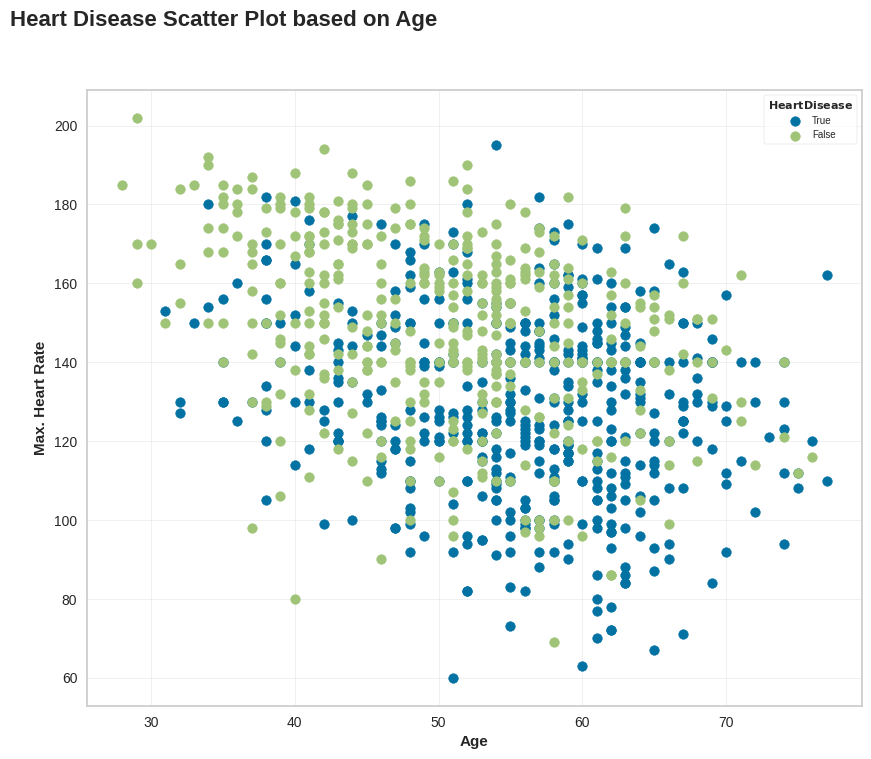

In [ ]:

# Crée une figure avec une taille de 10x8 pouces
plt.figure(figsize=(10, 8))
# Ajoute le titre principal de la figure en gras et centré sur la gauche
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16')
# Ajuste la disposition de la figure pour s'assurer que les titres s'affichent correctement
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Création du Scatter Plot ---
# Trace un nuage de points pour les patients avec une maladie cardiaque, en utilisant l'âge comme abscisse et la fréquence cardiaque maximale comme ordonnée
plt.scatter(x=df.age[(df.num!=0)], y=df.thalch[(df.num!=0)])
# Trace un nuage de points pour les patients sans maladie cardiaque
plt.scatter(x=df.age[(df.num==0)], y=df.thalch[(df.num==0)])

# --- Réglages de la Légende et des Étiquettes du Scatter Plot ---
# Ajoute une légende avec un titre en gras en utilisant la police de 7 points, et une bordure
plt.legend(['True', 'False'], title='$\\bf{Heart Disease}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
# Ajoute un titre d'axe x en gras avec une police de 11 points
plt.xlabel('Age', fontweight='bold', fontsize='11',
           )
# Ajoute un titre d'axe y en gras avec une police de 11 points
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
          )
# Change le format des étiquettes d'axe en nombres simples
plt.ticklabel_format(style='plain', axis='both')
# Ajoute une grille à la figure avec une transparence de 0,4 et une largeur de ligne de 0,5
plt.grid(axis='both', alpha=0.4, lw=0.5)


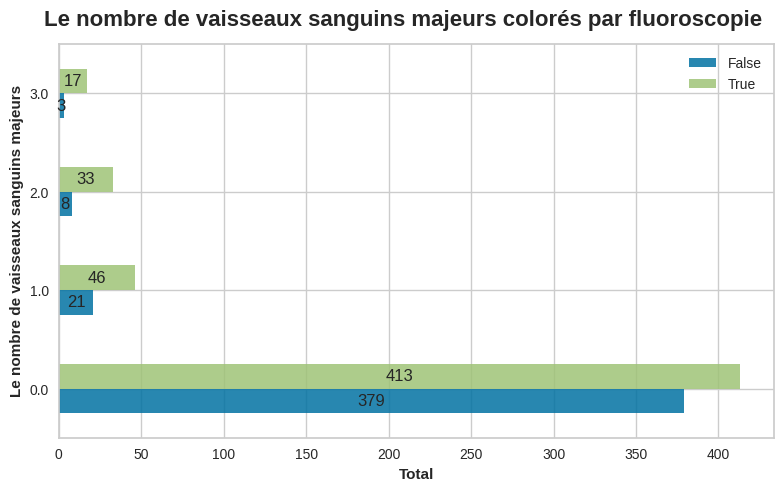

In [ ]:
# Création d'une nouvelle colonne avec des valeurs booléennes
df['colored_vessels'] = df['num'] != 0

# --- Labels Settings ---
# Création d'une liste de labels pour la légende
labels = ['False', 'True']

# --- Creating Bar Chart ---
# Création d'un diagramme à barres à partir de la table croisée de deux variables
ax = pd.crosstab(df.ca, df.colored_vessels).plot(kind='barh', figsize=(8, 5), alpha=0.85)

# --- Bar Chart Settings ---
# Ajout de labels pour chaque rectangle du diagramme à barres
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

# --- Titles and Labels Settings ---
# Titre principal du graphique
plt.suptitle('Le nombre de vaisseaux sanguins majeurs colorés par fluoroscopie', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16' 
            )

# Ajustement de la mise en page pour que tous les éléments soient bien positionnés
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
# Nom de l'axe x
plt.xlabel('Total', fontweight='bold')
# Nom de l'axe y
plt.ylabel('Le nombre de vaisseaux sanguins majeurs', fontweight='bold')
# Rotation des étiquettes de l'axe y pour qu'elles soient lisibles
plt.yticks(rotation=0)
# Modifier les étiquettes de la légende
ax.legend(labels=labels)


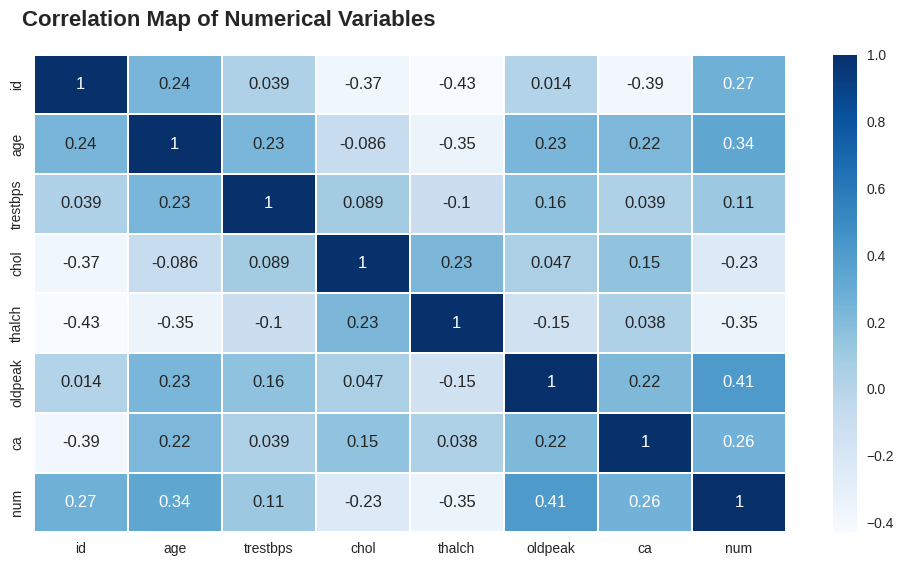

In [ ]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr(), annot=True, cmap='Blues', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [ ]:
X = df[['sex',  'cp','thal','slope', 'fbs', 'restecg', 'thalch','age' ,'oldpeak','chol','trestbps','ca' ,	'exang',	]] # Toutes les colonnes sauf la dernière
y = df['num'] # Dernière colonne comme étiquette de classe
# Division des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Création d'un modèle de régression logistique
model = LogisticRegression()
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(model,x_train,y_train, cv=5)


# Entraînement du modèle sur l'ensemble d'entraînement complet
model.fit(x_train,y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(x_test)

# Évaluation du modèle sur l'ensemble de test
test_score = model.score(x_test, y_test)

# Affichage des scores  de test
print(f"Score sur l'ensemble de test : {test_score:.3f}")

Score sur l'ensemble de test : 0.565


.:. Logistic Regression Accuracy: 56.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.71      0.93      0.80        75
         1.0       0.39      0.56      0.46        54
         2.0       0.00      0.00      0.00        25
         3.0       0.67      0.15      0.25        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.35      0.33      0.30       184
weighted avg       0.50      0.57      0.50       184


.: Performance Evaluation
**************************


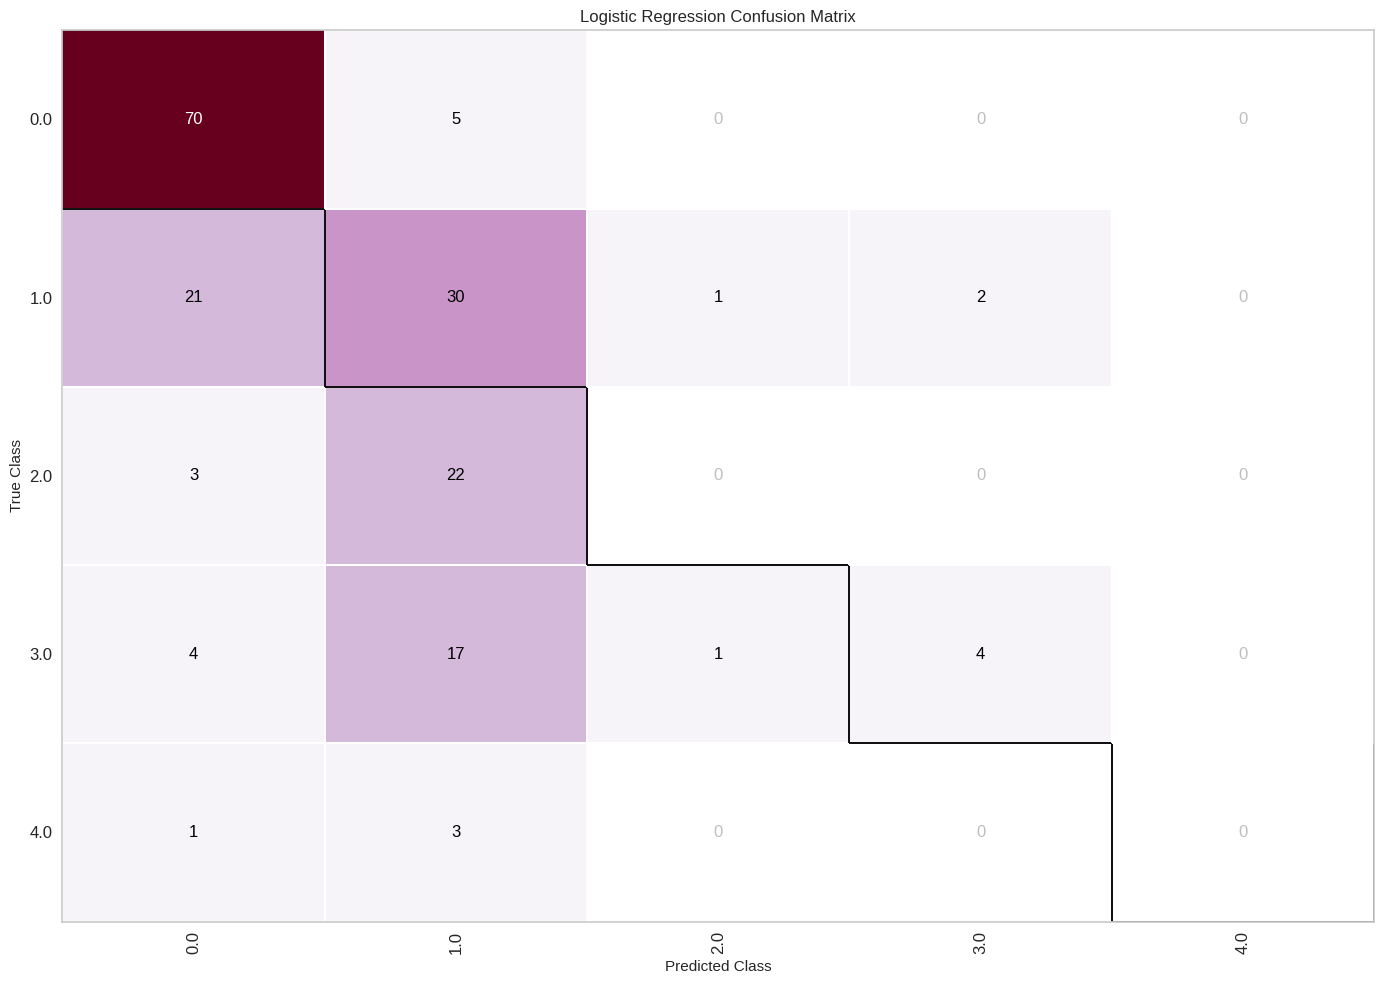

In [ ]:
# Calculer l'exactitude (accuracy) du modèle de régression logistique sur les données de test
LRAcc = accuracy_score(y_pred, y_test)

# Afficher le résultat de l'exactitude en pourcentage avec une chaîne de formatage
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')


# Afficher le rapport de classification en utilisant les étiquettes prédites et les étiquettes réelles
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred))


# Afficher une section de titre pour l'évaluation de la performance
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

# Créer une figure pour afficher la matrice de confusion
fig, ax1 = plt.subplots( figsize=(14, 10))

# Créer une matrice de confusion pour évaluer la performance du modèle
logmatrix = ConfusionMatrix(model, ax=ax1, cmap='PuRd', title='Logistic Regression Confusion Matrix')

# Ajuster la matrice de confusion aux données d'entraînement
logmatrix.fit(x_train, y_train)

# Calculer le score de la matrice de confusion sur les données de test
logmatrix.score(x_test, y_test)

# Finaliser et afficher la matrice de confusion
logmatrix.finalize()

In [ ]:
# Création d'un modèle de SVM
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(SVMclassifier, x_train, y_train, cv=5)
SVMclassifier.fit(x_train, y_train)
y_pred_SVM = SVMclassifier.predict(x_test)


.:. Support Vector Machine Accuracy: 47.28% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.48      0.97      0.64        75
         1.0       0.40      0.04      0.07        54
         2.0       0.57      0.32      0.41        25
         3.0       0.67      0.15      0.25        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.47       184
   macro avg       0.42      0.30      0.27       184
weighted avg       0.48      0.47      0.37       184


.: Performance Evaluation
**************************


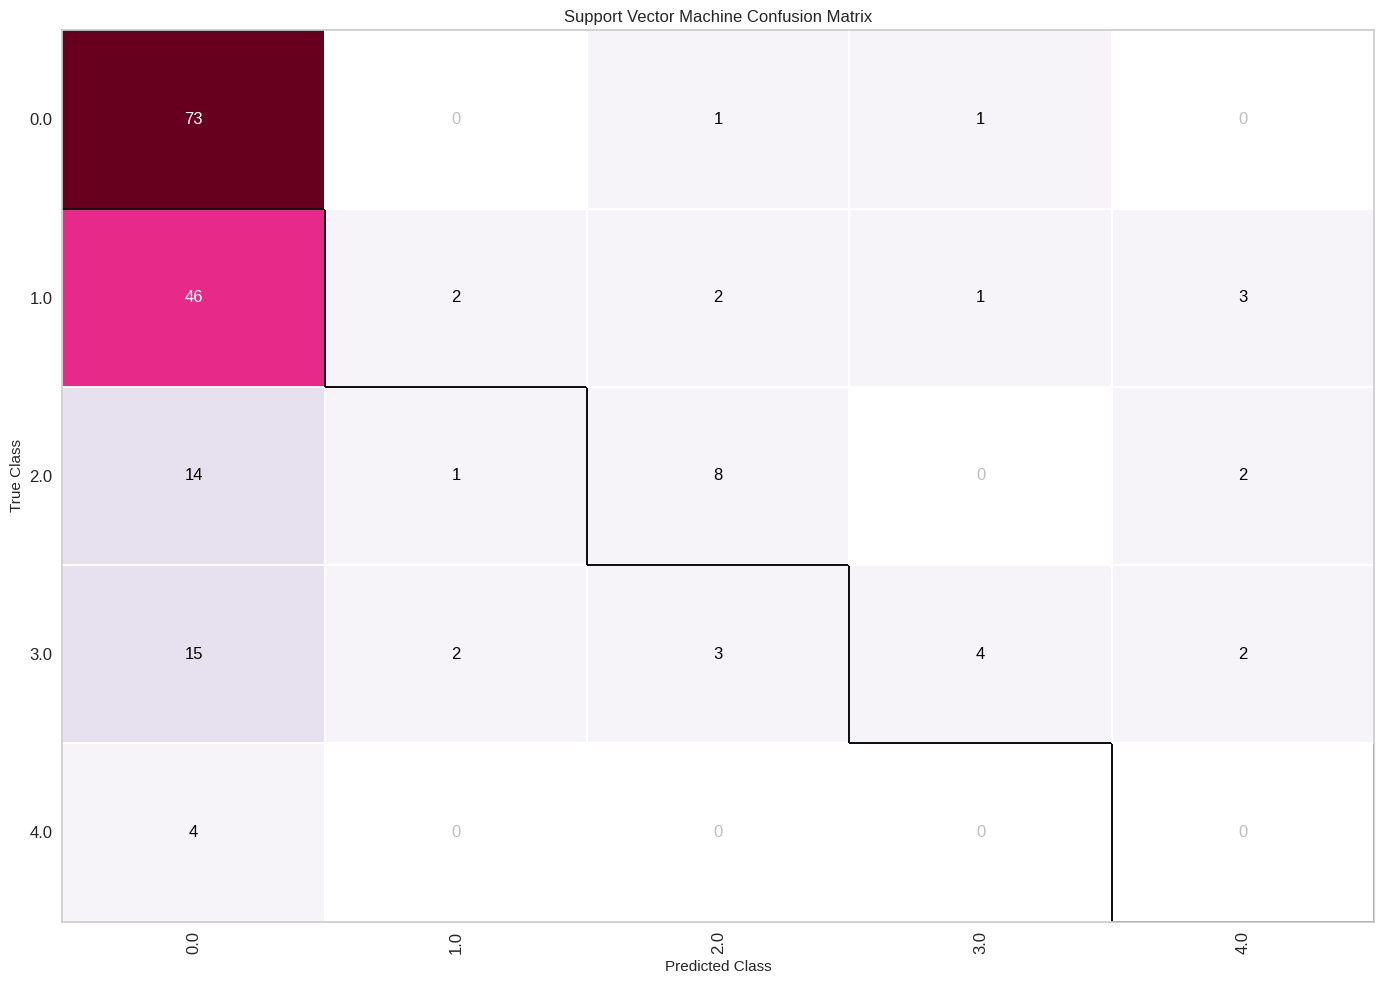

In [ ]:
# Calcul de l'accuracy score pour le modèle SVM
SVMAcc = accuracy_score(y_pred_SVM, y_test)

# Affichage de l'accuracy score avec une mise en forme particulière
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# Affichage d'un rapport de classification pour le modèle SVM
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# Évaluation des performances du modèle SVM
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# Affichage d'une matrice de confusion pour le modèle SVM
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()


In [ ]:
# Création d'un modèle de Decision Tree 
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(DTCclassifier, x_train, y_train, cv=5)
DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 52.72% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.56      0.93      0.70        75
         1.0       0.47      0.50      0.48        54
         2.0       0.00      0.00      0.00        25
         3.0       0.00      0.00      0.00        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.20      0.29      0.24       184
weighted avg       0.36      0.53      0.43       184


.: Performance Evaluation
**************************


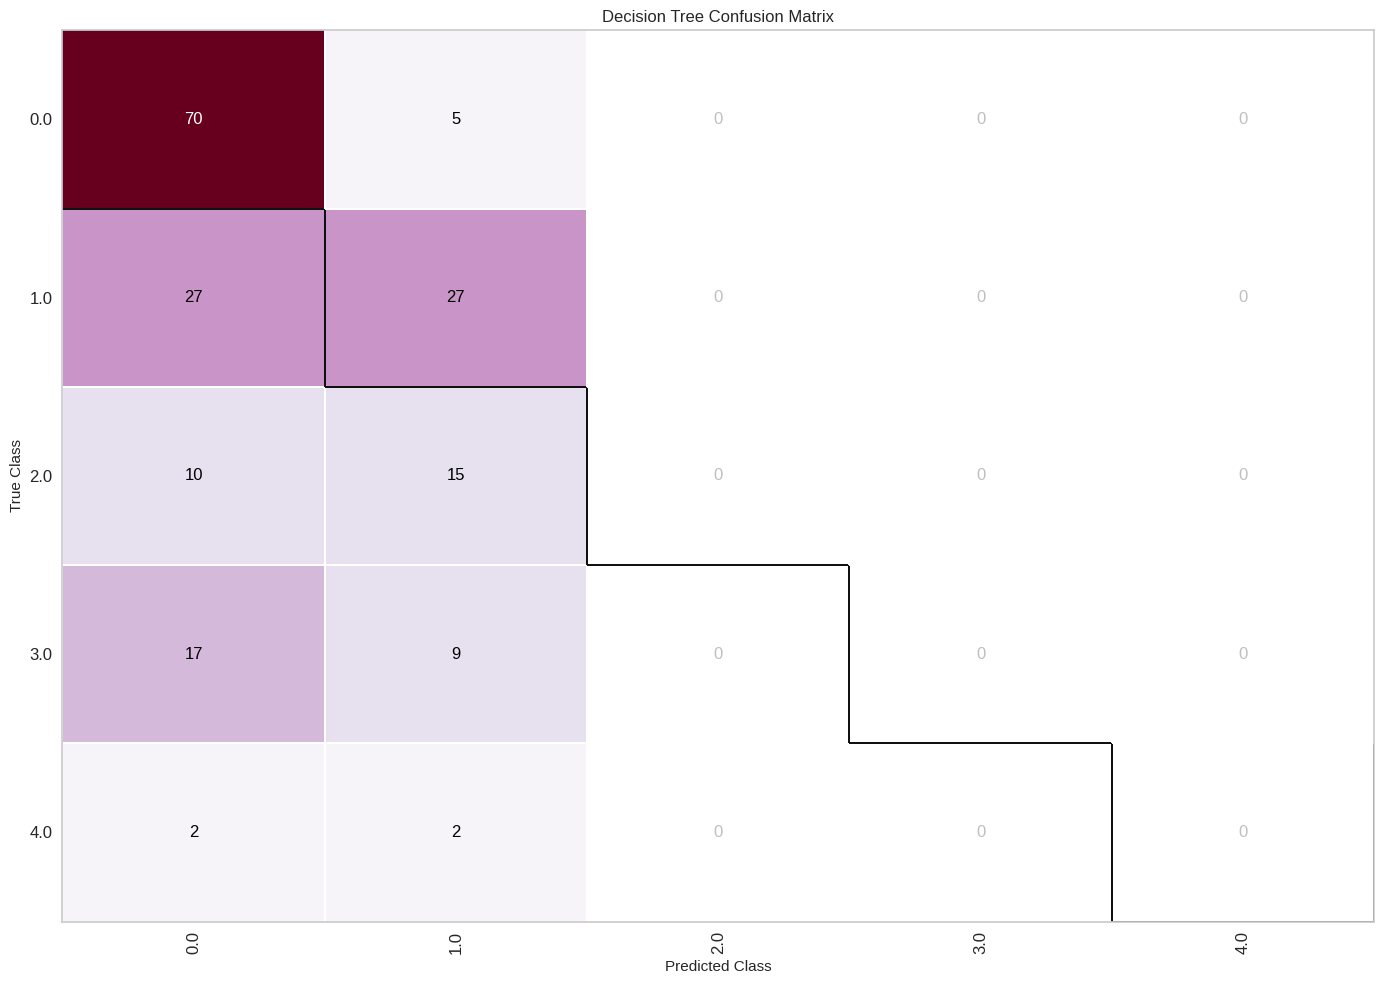

In [ ]:
# Calcul de l'accuracy score pour le modèle Decision Tree 
DTCAcc = accuracy_score(y_pred_DTC, y_test)
# Affichage de l'accuracy score avec une mise en forme particulière
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# Affichage d'un rapport de classification pour le modèle Decision Tree 
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# Affichage d'une matrice de confusion pour le modèle Decision Tree Confusion 
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

In [ ]:
# Création d'un modèle de Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(RFclassifier,x_train,y_train, cv=5)
RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 55.98% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.65      0.96      0.78        75
         1.0       0.43      0.56      0.48        54
         2.0       1.00      0.04      0.08        25
         3.0       0.00      0.00      0.00        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.56       184
   macro avg       0.42      0.31      0.27       184
weighted avg       0.53      0.56      0.47       184


.: Performance Evaluation
**************************


0.5597826086956522

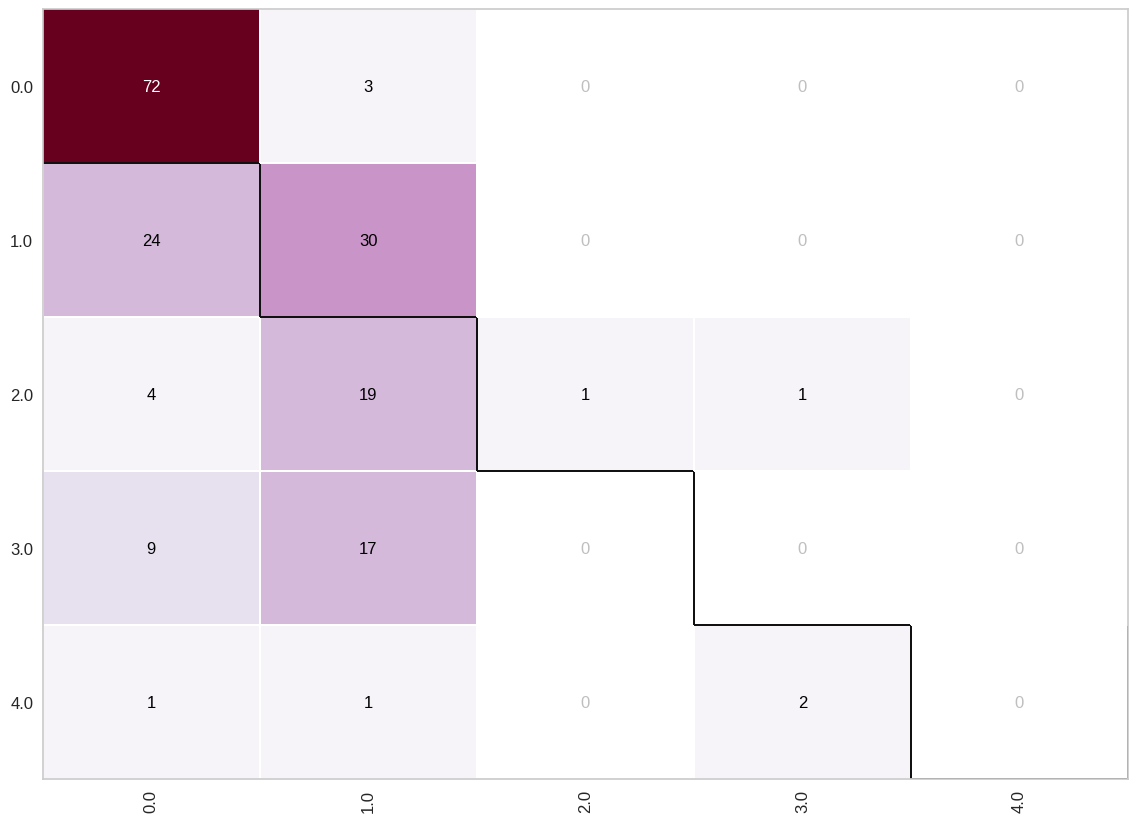

In [ ]:
# Calcul de l'accuracy score pour le modèle Random Forest 
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# Affichage de l'accuracy score avec une mise en forme particulière Random Forest 
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# Évaluation des performances du modèle Random Forest 
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# Affichage d'une matrice de confusion pour le modèle Random Forest 
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)

In [ ]:
# Liste des valeurs de k à tester
k_values = [1, 3, 5, 7, 9]

# Initialiser les listes pour stocker les résultats de validation croisée
mean_accuracies = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    # Initialiser les listes pour stocker les résultats pour cette valeur de k
    accuracies = []
    # Effectuer la validation croisée avec 5 plis
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Créer et entraîner le modèle KNN avec la valeur de k actuelle
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        # Prédiction sur l'ensemble de test
        y_pred = knn.predict(X_test)
        # Calculer la précision du modèle pour cette itération de validation croisée
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    # Calculer la précision moyenne  pour cette valeur de k
    mean_accuracy = np.mean(accuracies)
    # Ajouter les résultats dans les listes
    mean_accuracies.append(mean_accuracy)

# Trouver la valeur de k avec la meilleure précision moyenne
best_k = k_values[np.argmax(mean_accuracies)]

print("Résultats de validation croisée :")
for i in range(len(k_values)):
    print("k = {}: Précision moyenne = {:.4f}".format(k_values[i], mean_accuracies[i]))

print("\nMeilleure valeur de k : {}".format(best_k))

Résultats de validation croisée :
k = 1: Précision moyenne = 0.4043
k = 3: Précision moyenne = 0.4533
k = 5: Précision moyenne = 0.4707
k = 7: Précision moyenne = 0.4870
k = 9: Précision moyenne = 0.4957

Meilleure valeur de k : 9


In [ ]:
# --- Applying KNN ---
model = KNeighborsClassifier(n_neighbors=9)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(model,x_train,y_train, cv=5)
model.fit(x_train, y_train)
y_pred_KNN = model.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 42.39% .:.

.: Performance Evaluation
**************************


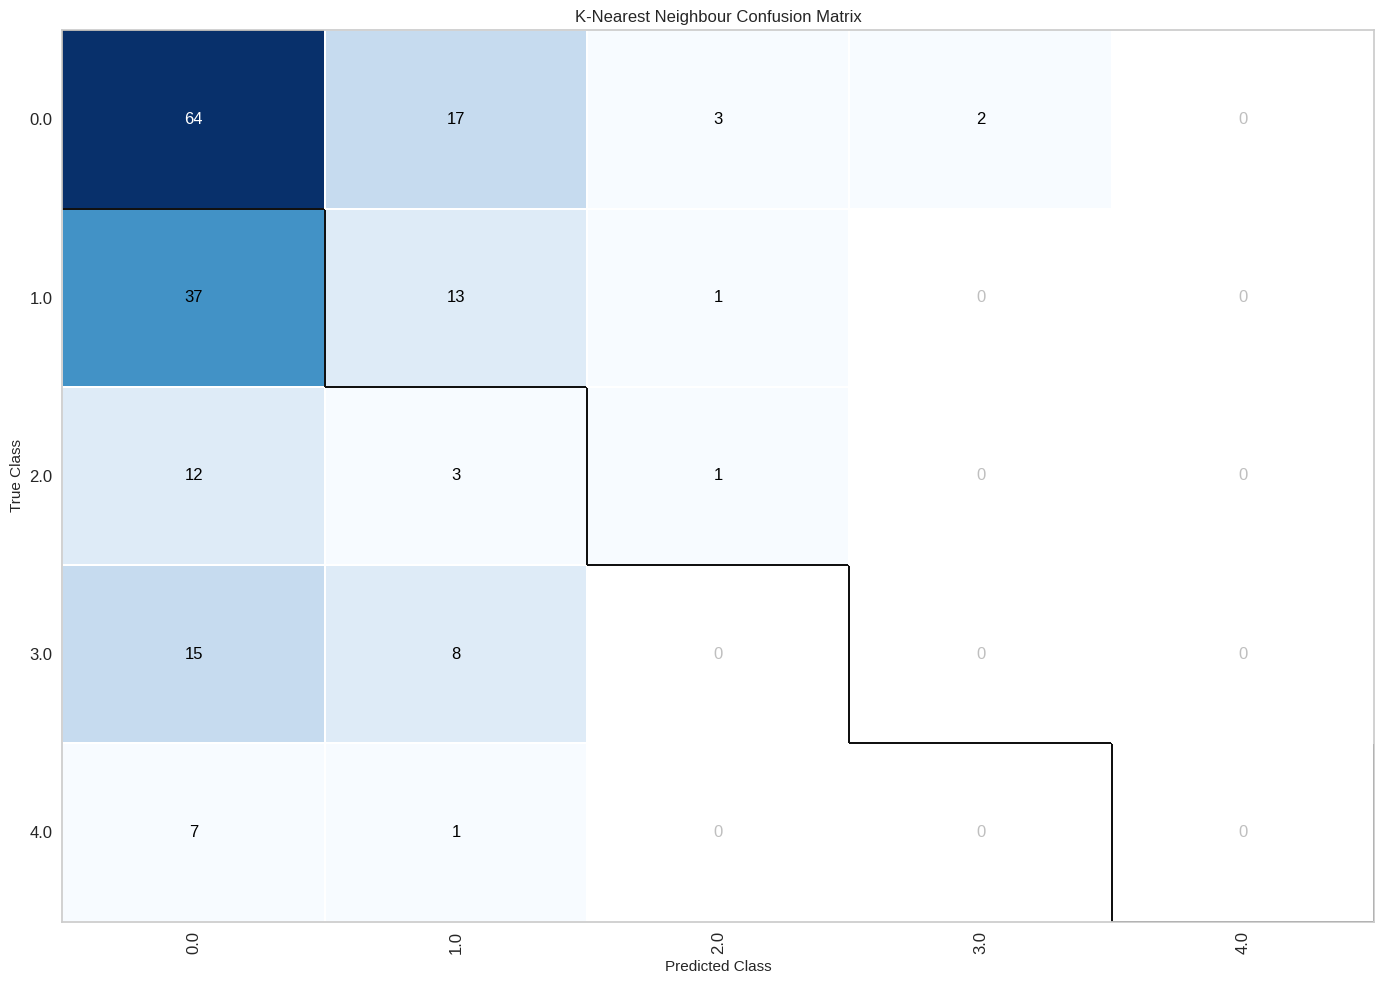

In [ ]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))
# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(model, ax=ax1, cmap='Blues',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

.:. AdaBoost Accuracy: 42.39% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.47      0.81      0.60        86
         1.0       0.22      0.16      0.18        51
         2.0       0.00      0.00      0.00        16
         3.0       0.00      0.00      0.00        23
         4.0       0.00      0.00      0.00         8

    accuracy                           0.42       184
   macro avg       0.14      0.19      0.16       184
weighted avg       0.28      0.42      0.33       184


.: Performance Evaluation
**************************


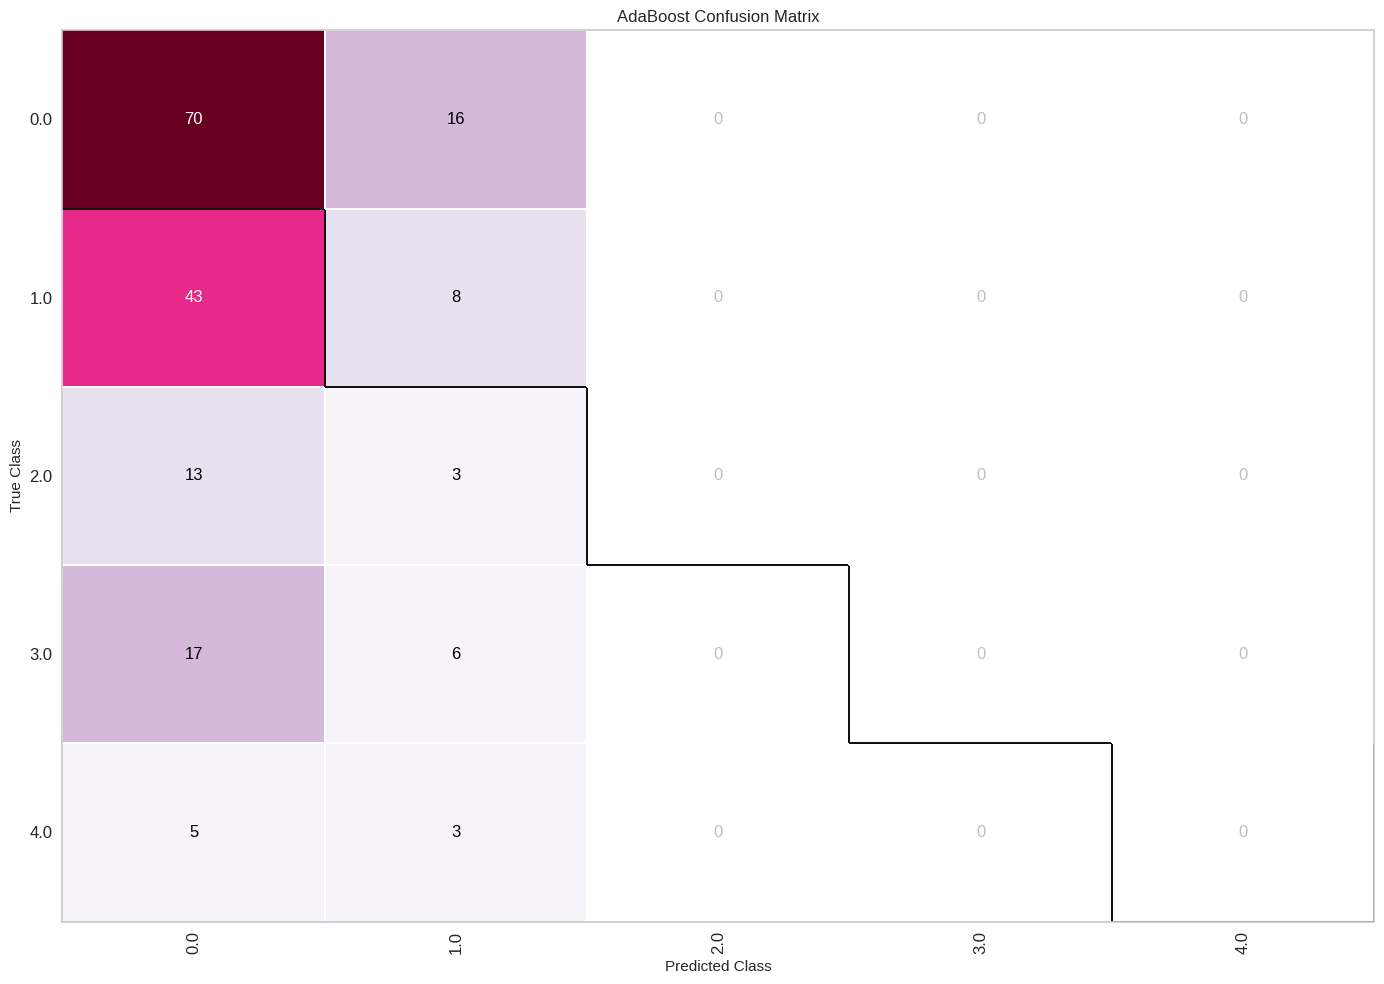

In [ ]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(ABclassifier,x_train,y_train, cv=5)
ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                 'Decision Tree', 'Random Forest' ,'AdaBoost'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100,DTCAcc*100, RFAcc*100,ABAcc*100
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})

Model,Accuracy
Logistic Regression,56.521739
Random Forest,55.978261
Decision Tree,52.717391
Support Vector Machine,47.282609
K-Nearest Neighbour,42.391304
AdaBoost,42.391304


In [ ]:
df=df.replace({'num': {1: 1, 2: 1,3:1,4:1}})

In [ ]:
X = df[['sex',  'cp','thal','slope', 'fbs', 'restecg', 'thalch','age' ,'oldpeak','chol','trestbps','ca' ,	'exang',	]] # Toutes les colonnes sauf la dernière
y = df['num'] # Dernière colonne comme étiquette de classe
# Division des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Création d'un modèle de régression logistique
model = LogisticRegression()
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(model,x_train,y_train, cv=5)


# Entraînement du modèle sur l'ensemble d'entraînement complet
model.fit(x_train,y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(x_test)

# Évaluation du modèle sur l'ensemble de test
test_score = model.score(x_test, y_test)

# Affichage des scores  de test
print(f"Score sur l'ensemble de test : {test_score:.3f}")

Score sur l'ensemble de test : 0.788


.:. Logistic Regression Accuracy: 78.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76        75
         1.0       0.86      0.76      0.81       109

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184


.: Performance Evaluation
**************************


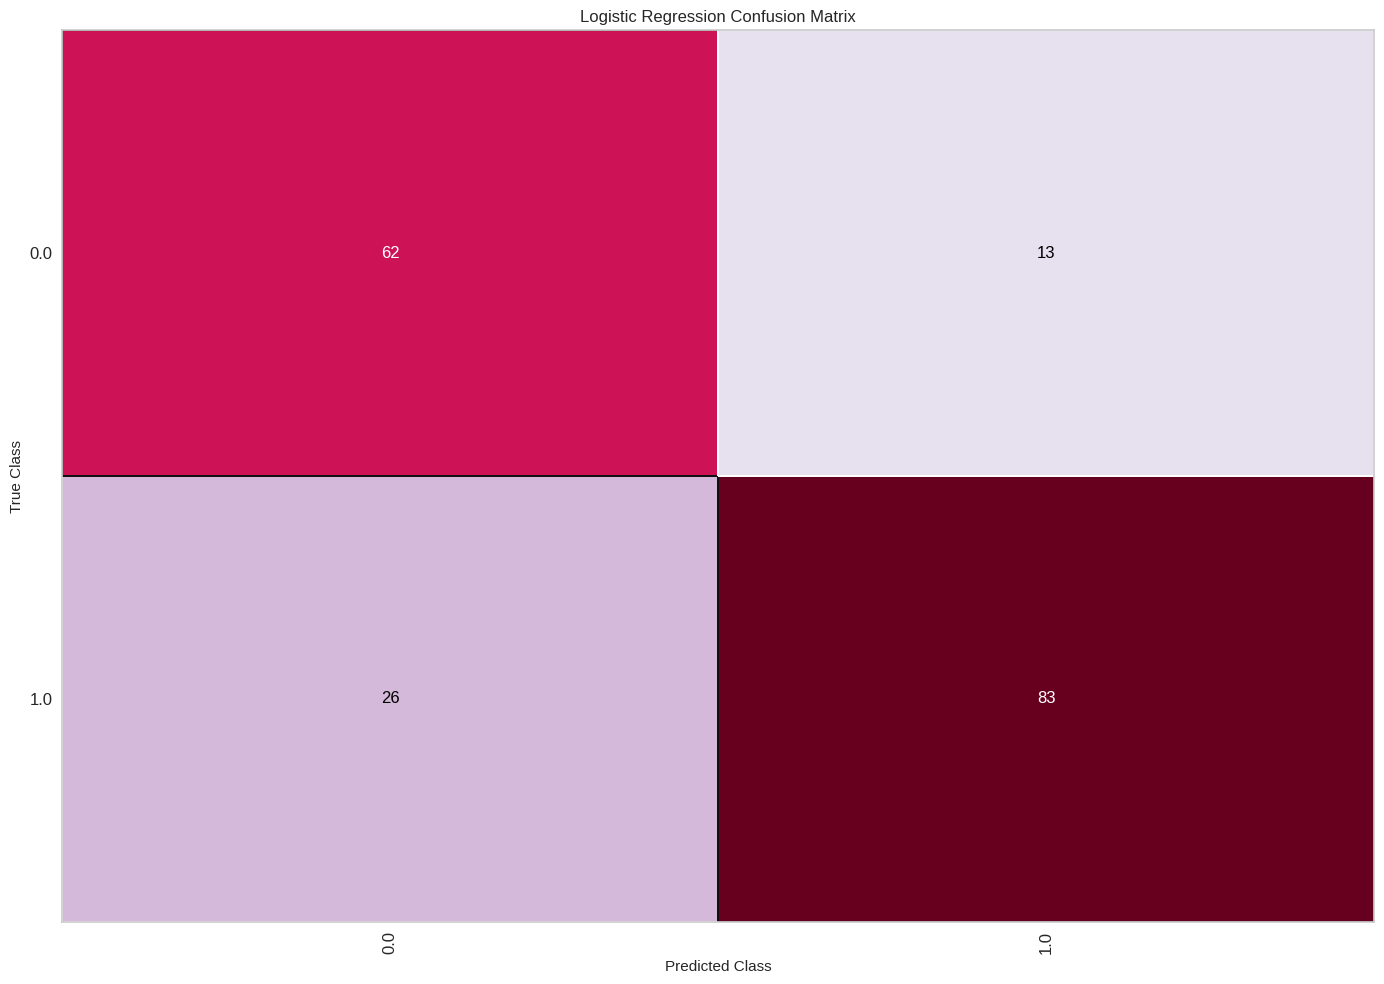

In [ ]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(model, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

In [ ]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(SVMclassifier, x_train, y_train, cv=5)
SVMclassifier.fit(x_train, y_train)
y_pred_SVM = SVMclassifier.predict(x_test)

.:. Support Vector Machine Accuracy: 56.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.48      0.97      0.65        75
         1.0       0.94      0.28      0.44       109

    accuracy                           0.57       184
   macro avg       0.71      0.63      0.54       184
weighted avg       0.75      0.57      0.52       184


.: Performance Evaluation
**************************


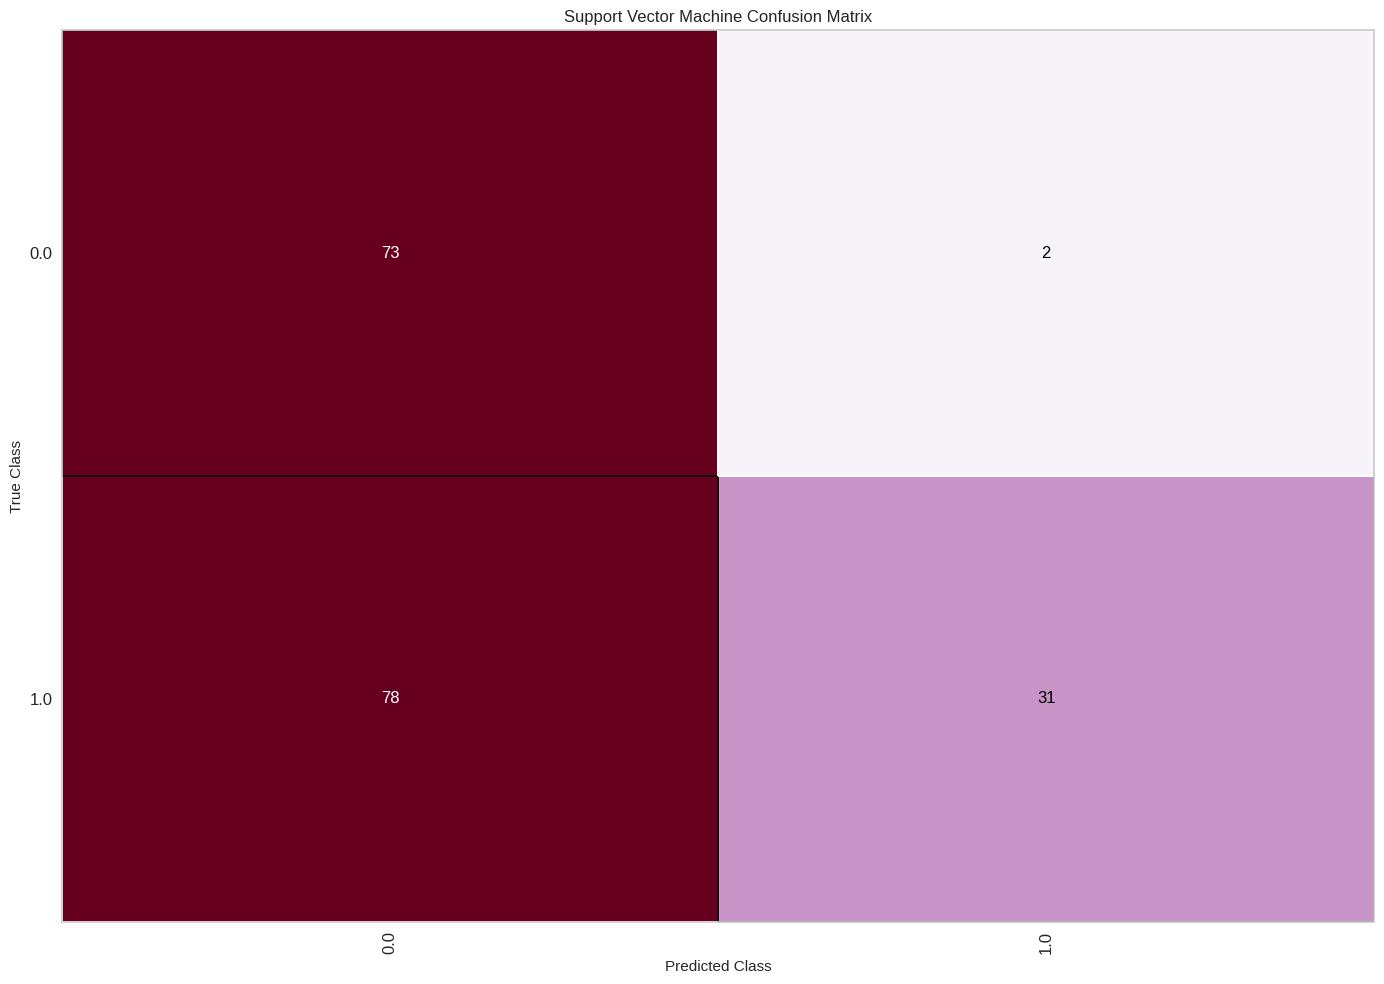

In [ ]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

In [ ]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(DTCclassifier, x_train, y_train, cv=5)
DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 78.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75        75
         1.0       0.85      0.78      0.81       109

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.79      0.79       184


.: Performance Evaluation
**************************


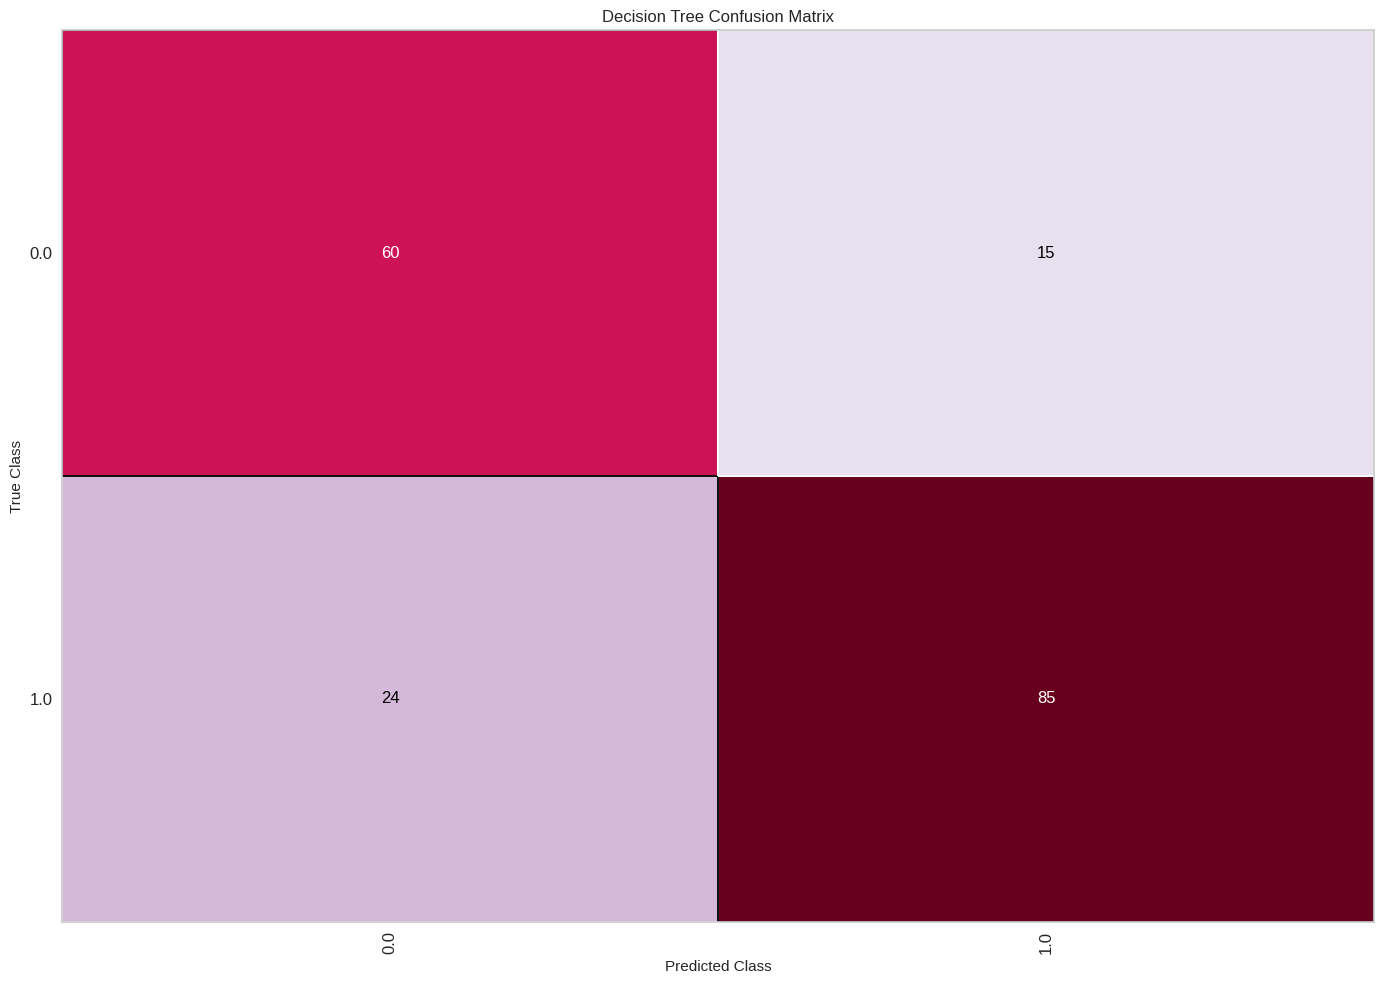

In [ ]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

In [ ]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(RFclassifier,x_train,y_train, cv=5)
RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 84.24% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81        75
         1.0       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


.: Performance Evaluation
**************************


0.842391304347826

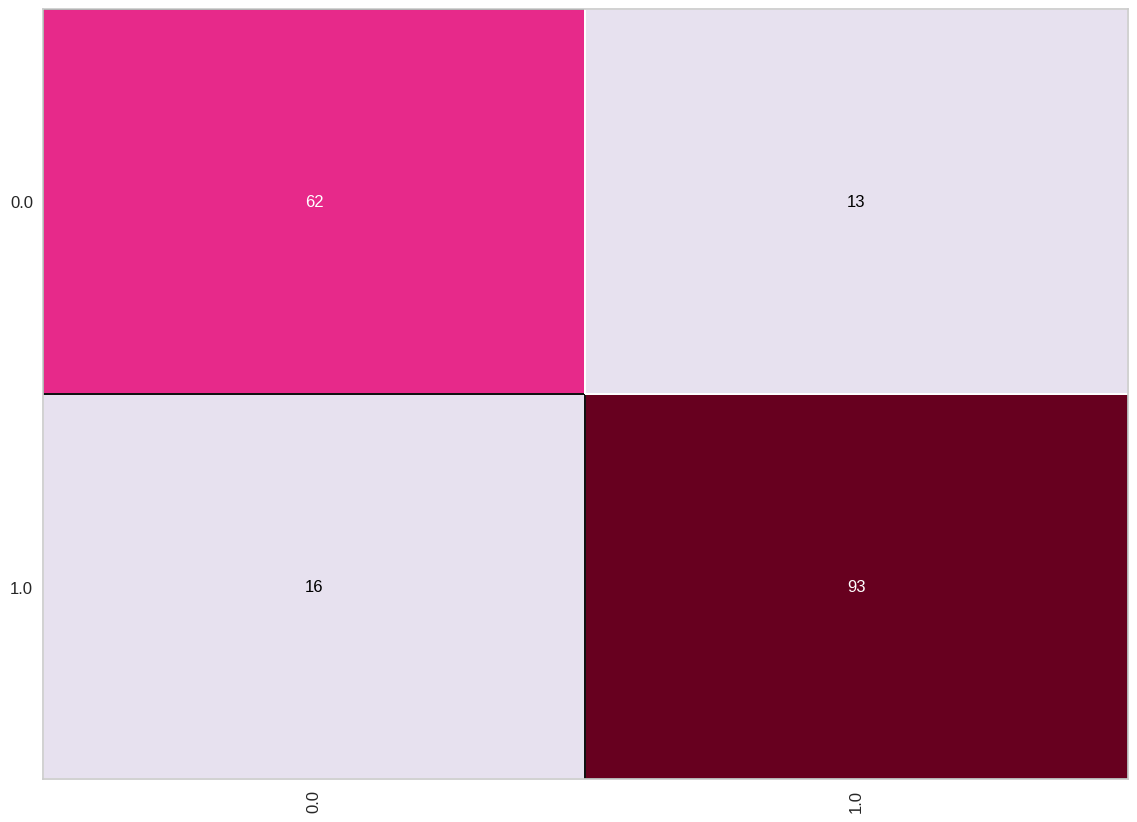

In [ ]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)

In [ ]:
# Liste des valeurs de k à tester
k_values = [1, 3, 5, 7, 9]

# Initialiser les listes pour stocker les résultats de validation croisée
mean_accuracies = []

# Boucle sur les différentes valeurs de k
for k in k_values:
    # Initialiser les listes pour stocker les résultats pour cette valeur de k
    accuracies = []
    # Effectuer la validation croisée avec 5 plis
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Créer et entraîner le modèle KNN avec la valeur de k actuelle
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        # Prédiction sur l'ensemble de test
        y_pred = knn.predict(X_test)
        # Calculer la précision du modèle pour cette itération de validation croisée
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    # Calculer la précision moyenne  pour cette valeur de k
    mean_accuracy = np.mean(accuracies)
    # Ajouter les résultats dans les listes
    mean_accuracies.append(mean_accuracy)

# Trouver la valeur de k avec la meilleure précision moyenne
best_k = k_values[np.argmax(mean_accuracies)]

print("Résultats de validation croisée :")
for i in range(len(k_values)):
    print("k = {}: Précision moyenne = {:.4f}".format(k_values[i], mean_accuracies[i]))

print("\nMeilleure valeur de k : {}".format(best_k))

Résultats de validation croisée :
k = 1: Précision moyenne = 0.6522
k = 3: Précision moyenne = 0.6565
k = 5: Précision moyenne = 0.6837
k = 7: Précision moyenne = 0.7022
k = 9: Précision moyenne = 0.7217

Meilleure valeur de k : 9


In [ ]:
# --- Applying KNN ---
model = KNeighborsClassifier(n_neighbors=9)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(model,x_train,y_train, cv=5)
model.fit(x_train, y_train)
y_pred_KNN = model.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 50.00% .:.

.: Performance Evaluation
**************************


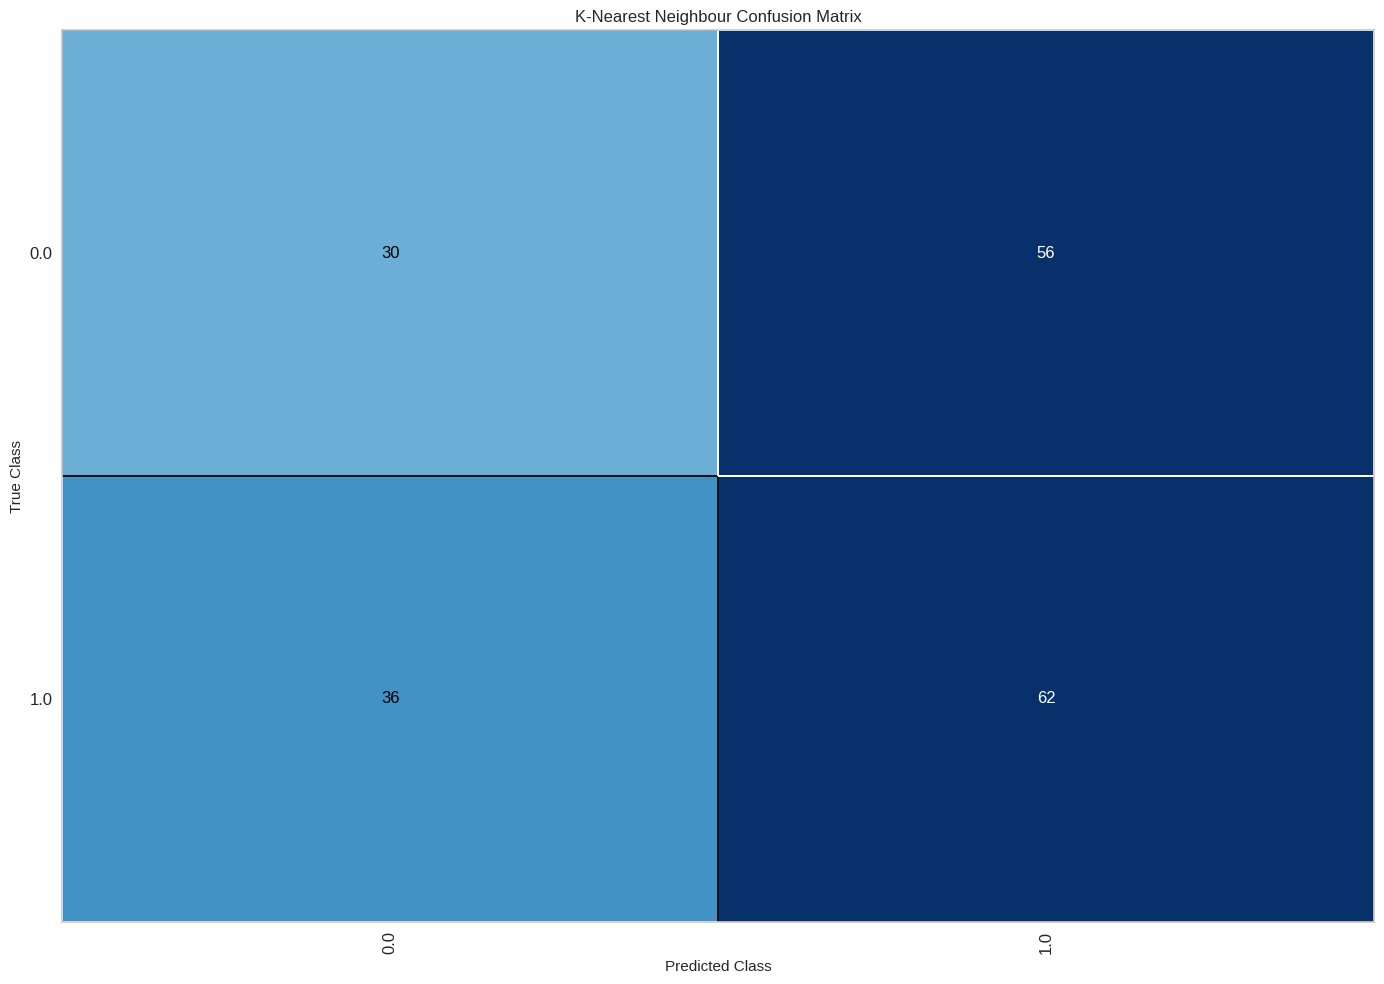

In [ ]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))
# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(model, ax=ax1, cmap='Blues',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

.:. AdaBoost Accuracy: 54.89% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.60      0.10      0.18        86
         1.0       0.54      0.94      0.69        98

    accuracy                           0.55       184
   macro avg       0.57      0.52      0.43       184
weighted avg       0.57      0.55      0.45       184


.: Performance Evaluation
**************************


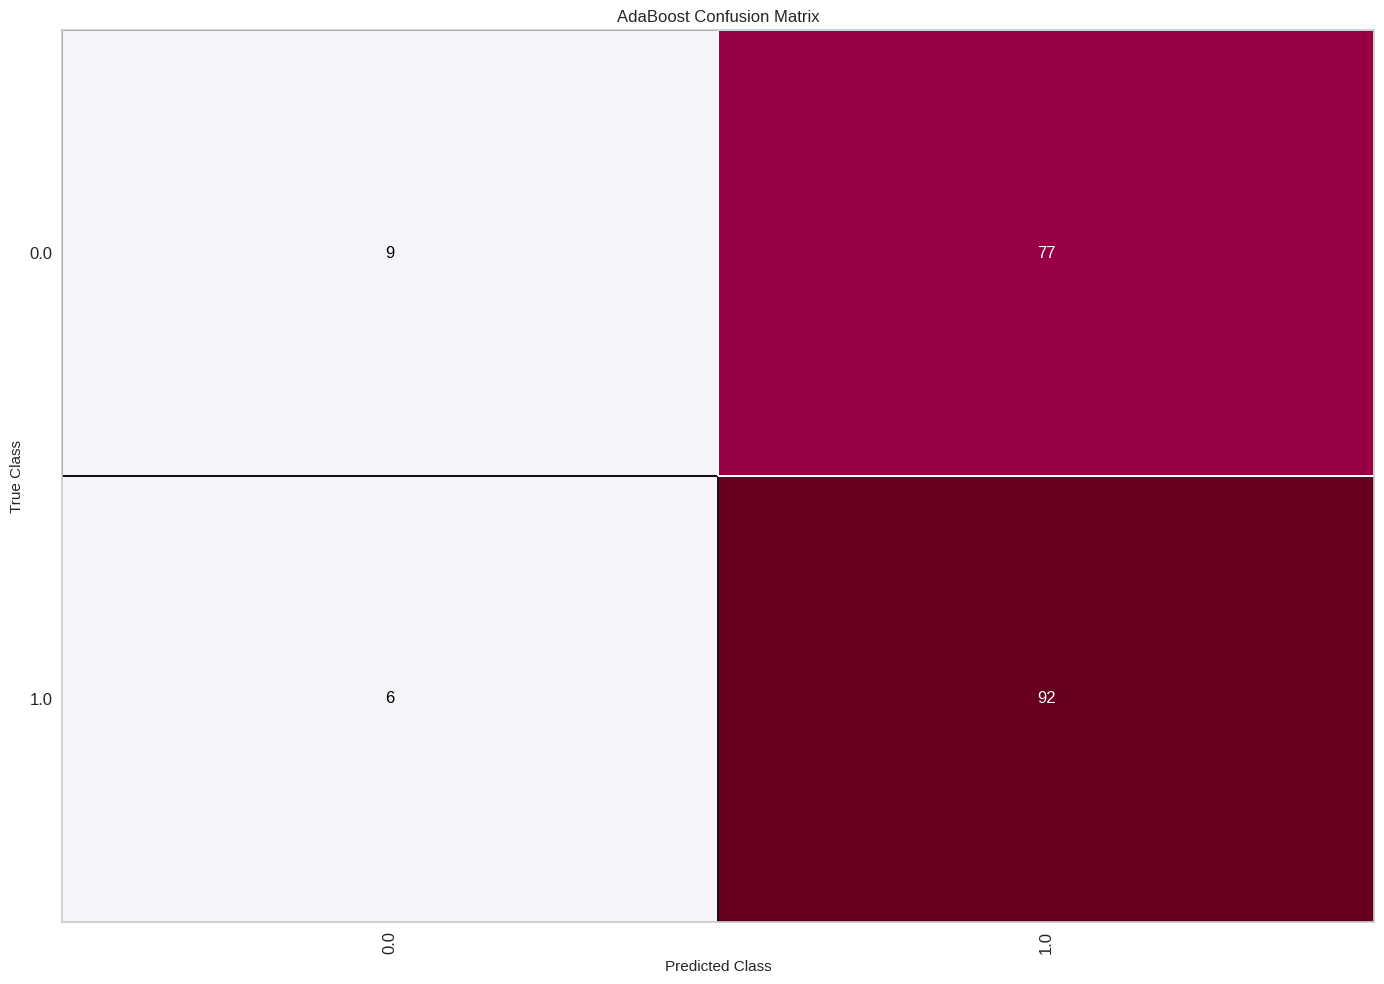

In [ ]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)
# Validation croisée à 5 plis sur les données d'entraînement
scores = cross_val_score(ABclassifier,x_train,y_train, cv=5)
ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ax1 = plt.subplots( figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                 'Decision Tree', 'Random Forest' ,'AdaBoost'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100,DTCAcc*100, RFAcc*100,ABAcc*100
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})

Model,Accuracy
Random Forest,84.239130
Logistic Regression,78.804348
Decision Tree,78.804348
Support Vector Machine,56.521739
AdaBoost,54.891304
K-Nearest Neighbour,50.000000
